In [ ]:
import pandas as pd

# Load the sales data
sales_data = pd.read_csv('sales_data.csv')

# Display the first few rows of the dataframe
sales_data.head()

,Date,Time,StoreID,CustomerID,OrderID,Product Name,Size,Crust
0,2024-12-04,17:40:59,0,0,0,Meat Lovers,small,thick
1,2024-12-04,17:40:59,0,0,1,Meat Lovers,small,thin
2,2024-12-04,17:40:59,0,0,1,BBQ Chicken,large,stuffed crust
3,2024-12-04,17:40:59,0,0,1,Supreme,small,thick
4,2024-12-04,17:40:59,0,0,1,Veggie,small,thin


In [ ]:
# Count the occurrences of each product
product_counts = sales_data['Product Name'].value_counts()

# Display the most prevalent products
print(product_counts.head())

Product Name
Margherita     5792
Supreme        5669
Meat Lovers    5658
Veggie         5649
Hawaiian       5564
Name: count, dtype: int64


In [ ]:
# Define a large basket as having more than a certain number of items
large_basket_threshold = 5

# Group by CustomerID and count the number of items in each basket
basket_sizes = sales_data.groupby('CustomerID').size()

# Count the number of large baskets
large_basket_counts = basket_sizes[basket_sizes > large_basket_threshold].count()

# Display the frequency of large buyers
print(large_basket_counts)

10


In [ ]:
# Group by StoreID and count the number of large baskets in each store
large_basket_stores = sales_data[sales_data['CustomerID'].isin(basket_sizes[basket_sizes > large_basket_threshold].index)]
store_large_basket_counts = large_basket_stores['StoreID'].value_counts()

# Display the stores with large-basket buyers
print(store_large_basket_counts)

StoreID
335    115
30     114
378    108
32     107
165    107
      ... 
202     73
241     72
307     72
207     72
128     72
Name: count, Length: 500, dtype: int64


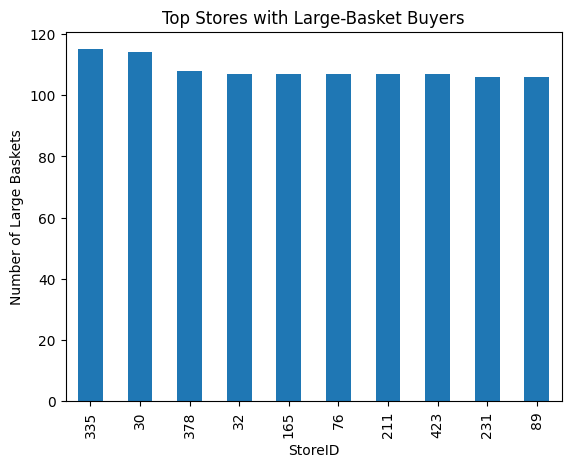

In [ ]:
import matplotlib.pyplot as plt

# Plot the top stores with large-basket buyers
store_large_basket_counts.head(10).plot(kind='bar')
plt.title('Top Stores with Large-Basket Buyers')
plt.xlabel('StoreID')
plt.ylabel('Number of Large Baskets')
plt.show()

In [ ]:
# Get the products in large baskets
large_basket_products = large_basket_stores['Product Name'].value_counts()

# Display the top-N products
top_n = 10
print(large_basket_products.head(top_n))

Product Name
Margherita     5792
Supreme        5669
Meat Lovers    5658
Veggie         5649
Hawaiian       5564
Pepperoni      5528
Cheese         5527
BBQ Chicken    5474
Name: count, dtype: int64


In [ ]:
# Group by CustomerID and get the average basket makeup
basket_makeup = sales_data.groupby('CustomerID')['Product Name'].apply(lambda x: x.value_counts(normalize=True))

# Display the average categorical makeup of baskets
print(basket_makeup.head())

CustomerID             
0           Meat Lovers    0.129887
            Pepperoni      0.128584
            Supreme        0.125543
            Margherita     0.125543
            BBQ Chicken    0.124891
Name: Product Name, dtype: float64


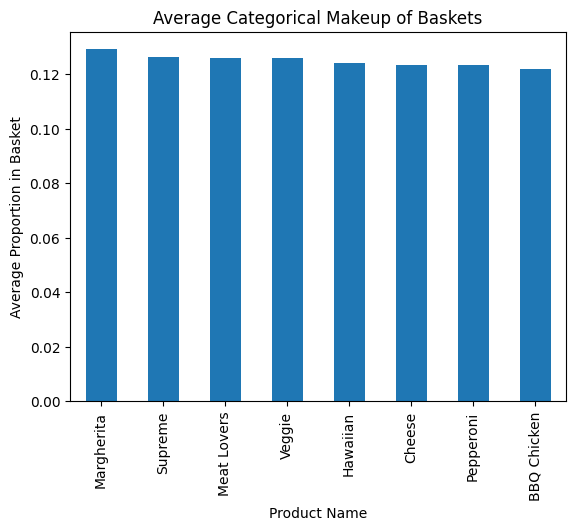

In [ ]:
# Plot the categorical makeup of baskets
basket_makeup_df = basket_makeup.unstack().mean().sort_values(ascending=False)
basket_makeup_df.plot(kind='bar')
plt.title('Average Categorical Makeup of Baskets')
plt.xlabel('Product Name')
plt.ylabel('Average Proportion in Basket')
plt.show()